# init

In [1]:
import sys 
sys.path.append('pyfiles/')
import classes_loop as cl
# so we don't have to reboot kernel every time we modify classes.py
%load_ext autoreload
%autoreload 2

# math stuff
import numpy as np
import math
# visualization
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial import distance
from copy import deepcopy

import matplotlib.pyplot as plt
%matplotlib inline
# sliders
from ipywidgets import interactive

# for matrix import and display
import pandas as pd
from IPython.display import display_html 
import csv 

# to time things
import time
# for removing punctuation from str
import string

# for polygon grid
from matplotlib.path import Path as mplPath

######## NOTE: from this point on, order is important. 
# it would be good to make the code more robust, but right
# now, there are ordered dependencies between functions.

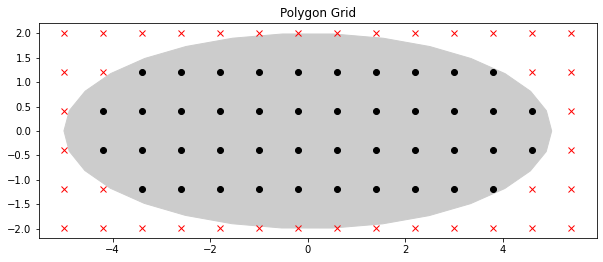

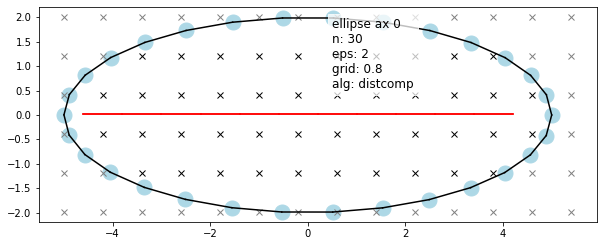

In [74]:
############################
# CONTROL PARAMETERS # 
############################

name = 'ellipse'
n = 30
# NOTE: eps has different meaning for use_distknee and not
# higher is more pruned in both
e = 2
# 0.8 is default
g = 0.8
# these shift the grid over
x_shift = 0
y_shift = 0
pts = cl.ellipse_example(n, display = False)

medaxdim = 0
# true means we use comparison of distance and eps is multiplier
# false means we use eps-nearest neighbor
use_dist = True

gridon = True
makevor = False

#############################
# ISSUE: distance in use_dist is euclidean, not geodesic
# lower left corner
textboxcoords = [.5, .55]

filename = cl.generate_filename(n, e, g, x_shift, y_shift, name, medaxdim, use_dist)
# testpoint tests a manually entered grid point and 
# spits out the info about it for debugging, but only if testpoint is True
# make medial axis
cl.make_medial_axis(numpts = n, epsilon = e, grid_density = g, 
                    inputpts = pts, design = name, axis = medaxdim, drawgrid = gridon,
                    savefig = True, figsavename = filename + '.png',
                    x_bump = x_shift, y_bump = y_shift, plotpoints = False, 
                    textboxcoords = textboxcoords, textboxon = True,
                    testpointinfo = (2, -0.5), testpoint = False,
                    use_distknee = use_dist)
# NOTE: newest addition, usedistknee, still needs to be tested to make sure it's right
# use with caution
# make voronoi
if makevor:
    vor = Voronoi(pts)
    fig, ax = plt.subplots()
    # plot voronoi stuff
    ax.set_aspect('equal')
    fig2 = voronoi_plot_2d(vor, ax, show_vertices=True, 
                    line_alpha = 1, show_points = True, 
                    point_colors='orange', point_size=10);
    plt.savefig('../shapes_medax/' + filename +'v.png', dpi = 300)

In [ ]:
# control parameters 
# note to self: we control poisson seed for reproducability.
# it could also be a param here, or released to go randomly.
n = 20
epsilon = 1
inputt = cl.ellipse_example(n, display = False);
poisson_intensity = .4
axisdim = 0
printinfo = False
use_dist_based_alg = True


cl.make_poisson_vor_med_ax(inputt, n, epsilon, 
                        poisson_intensity, axisdim, 
                        use_dist_based_alg = True, 
                        printinfo = False,textboxon = True)

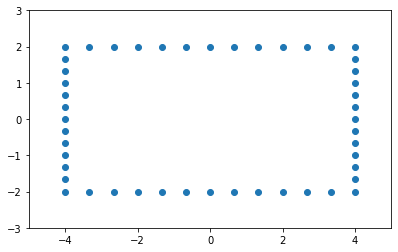

In [363]:
cl.rectangle_example(50, display = True);

2.2271618164380254
2.2574265759960905
2.2796879314199217
[21, 22, 23, 24, 25]


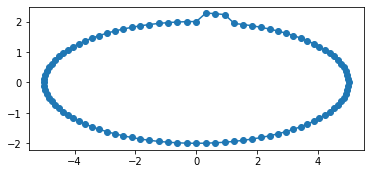

In [218]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
def bumped_ellipse_example(numpts = 70, display=False, bump = 0.5, k = 0.4, leftpt = 0, rightpt = 2):
    # parametric equation for ellipse:
    # F(t) = (x(t), y(t)), where x(t) = a*cos(t) and y(t) = b*sin(t) + bump*sin(t)

    # parameters for ellipse shape and sampling density
    a = 5
    b = 2

    # number of points
    t = np.linspace(0, 2*np.pi, numpts, endpoint=False)
    x = a*np.cos(t)
    y = b*np.sin(t) 
    y2 = y + np.where(y > 0, bump*np.sin(k*t), 0)
    bumprange = set({})
    
    for i in range(len(x)):
        if x[i] > leftpt and x[i] < rightpt and y[i] > 0:
            y[i] = y2[i]
            bumprange.add(i - 1)
            bumprange.add(i)
            bumprange.add(i + 1)
            print(y[i])
            
    bumprange = list(bumprange)
    print(bumprange)
    xinrange = []
    yinrange = []
    for i in range(len(bumprange)):
        xinrange.append(x[bumprange[i]])
        yinrange.append(y[bumprange[i]])
            
    points = np.column_stack((x, y))
    
#     cubic_interpolation_model = interp1d(np.array(x[bumprange[0]:x[bumprange[-1]]]), 
#                                          np.array(y[rrange[0]:y[rrange[-1]]]), 
#                                          kind = "cubic")
 

    if display:
        fig, ax = plt.subplots()
        ax.set_aspect('equal')
        ax.plot(x, y, '-o')
        plt.show()

    return points

bumped_ellipse_example(numpts = 100, display = True, 
                       bump = 0.5, k = 0.4, leftpt = 0, rightpt = 1);



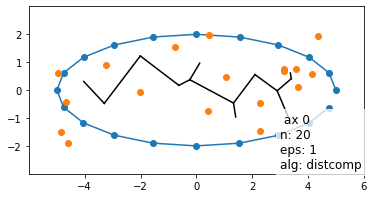

In [6]:
# # control parameters 
# # note to self: we control poisson seed for reproducability.
# # it could also be a param here, or released to go randomly.
# n = 20
# epsilon = 1
# inputt = cl.ellipse_example(n, display = False);
# poisson_intensity = .4
# axisdim = 0
# printinfo = False
# use_dist_based_alg = True


# cl.make_poisson_vor_med_ax(inputt, n, epsilon, 
#                         poisson_intensity, axisdim, 
#                         use_dist_based_alg = True, 
#                         printinfo = False,textboxon = True)

## EXAMPLES

## usage reminders

In [ ]:
# usage reminders
points, inside, x_range, y_range = \
cl.polygon_grid(cl.ellipse_example(10), 0.8, plot = True);

cl.plot_nbrs(10, points, inside, x_range, y_range)
# x_range is all of the x points repeated across the grid
cl.find_neighbors(10, inside, x_range, y_range)
# r, l, up, down

# x_range is all of the x points repeated across the grid
cl.find_neighbors(10, inside, x_range, y_range)
# r, l, up, down

# each row in neighbs is two special points to check knees between 
neighbs = cl.neighb_pairs(points, inside, x_range, y_range)

(-4.0, 4.0)

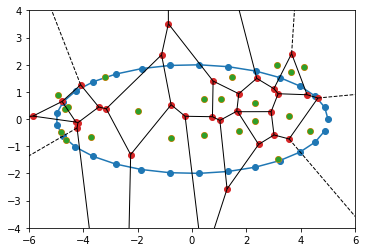

In [7]:
fig, ax = plt.subplots()
ax.set_aspect('equal')


inputt = cl.ellipse_example(29, display = False);
poissonpts = make_poisson(inputt, .5, display = False);
ax.plot(inputt[:,0], inputt[:,1], "-o")
ax.plot(poissonpts[:,0], poissonpts[:,1], "o")

vor = Voronoi(poissonpts)
fig2 = voronoi_plot_2d(vor, ax, show_vertices=True, 
                line_alpha = 1, show_points = True, 
                point_colors='orange', point_size=10);

ax.set_xlim(-6,6)
ax.set_ylim(-4,4)

[]

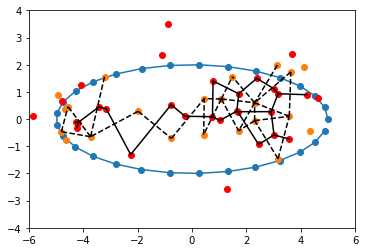

In [8]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
    
inputt = cl.ellipse_example(29, display = False);
poissonpts = make_poisson(inputt, .5, display = False);
ax.plot(inputt[:,0], inputt[:,1], "-o")
ax.plot(poissonpts[:,0], poissonpts[:,1], "o")

vor = Voronoi(poissonpts)
#plt.plot(vor.points[:,0], vor.points[:,1], 'o', color = 'black')
ax.set_xlim(-6,6)
ax.set_ylim(-4,4)
# vor verts
ax.plot(vor.vertices[:,0], vor.vertices[:,1], 'o', color = 'red')

# Determine if each vor point is inside polygon
# note: inputt means ie ellipse
# ridgepts are the verts of vor edges
inside = mplPath(inputt).contains_points(vor.vertices)

ridge_vertices = np.array(vor.ridge_vertices)
# voronoi package indexes such that -1 doesn't mean last element, 
# it means element is inf
infis0 = ridge_vertices[:,0] >= 0
infis1 = ridge_vertices[:,1] >= 0
# t/f vectors that say if the point indexed by ids is in or out
pt0inside = inside[ridge_vertices[:,0]]
pt1inside = inside[ridge_vertices[:,1]]
# indices of vertices of lines we want
ids = ridge_vertices[infis0 & infis1 & pt0inside & pt1inside]
# these are the vertices of voronoi edges which are not infinite

# these are vor verts
verts_of_inside_vor_edges = vor.vertices[ids]

for i in range(len(verts_of_inside_vor_edges)):
    x0, y0 = verts_of_inside_vor_edges[i,0]
    x1, y1 = verts_of_inside_vor_edges[i,1]
    ax.plot([x0, x1], [y0,y1], color = 'black')

# ridge pts are input pts (poisson pt pr points)
# delaunay triangulation
ridge_points = np.array(vor.ridge_points)
ids2 = ridge_points[infis0 & infis1 & pt0inside & pt1inside]

del_edges_of_good_vor_edges = vor.points[ids2]

for i in range(len(del_edges_of_good_vor_edges)):
    x0, y0 = del_edges_of_good_vor_edges[i,0]
    x1, y1 = del_edges_of_good_vor_edges[i,1]
    ax.plot([x0, x1], [y0,y1], '--', color = 'black')

ax.plot()

### Zeroth Medial Ax

### First Medial Ax

## DEBUG LIST
- figure out if matrix[:][0] always has to be matrix[:,0] instead
- matrix.shape[1] is better than len(matrix[:][0])

from ondra: 
So arr[:][0] is kind of a pointless notation, because that is just arr[0]. You first do arr[:], which just returns the full array back to you, and then you take the first element of it -- that is, read it as (arr[:])[0]. Since number_of_cols = len(self.initmatrix[0]) is the right way to ask for number of columns (it's the length of the first row), your construction with the unnecessary [:] was also giving the correct result.

## -----------------------------------
# ask herbert

- eventually, instead of a uniform grid, should we use voronoi edges from a poisson point process to get rid of symmetry issues? 


## ------------------------------------
# add to manuscript
- sneaky trick in finding knees in 2D (that you compare way fewer things) 
- add figures of examples
- compare changes to epsilon, n, grid density
- comment that as n increases, so does epsilon
- try to explain why this med ax goes to edges instead of stopping at centers of curvature
- Stability: do a few experiments where ellipse gets bumps, and compare to vor med ax

## check 0 death / 1 birth switch

- if the simplex s in vin.matrixlist[0] that killed the empty set is much different than the one that killed the empty set in vin.matrixlist[1], then there is a dim 0 Type 3 Knee 
- this is easier to check than the next dimension of knee, because there's guaranteed to always be a simplex that kills the empty set if the complex isn't empty

# next: 
- pretty pictures. would be nice to visualize birth/death
- animations?! showing growth of complext for one point, and also for moving point around
- maths stuff: be able to tell if it's a type 3 knee
- make things faster: sparse matrix
- don't store things in duplicates
- later: refinement

# ToDo: 
- would be cool: replot the graph, but labeling mothers and murderers
- also cool: make graph into an animation that shows whole process
- separate voroni MA from example and add it as a graph option
- n4 -> n3 change to reduction 
- instead of separately finding zero cols and lowest ones, save them as we smart reduce
-----

- to sell the work better: start writing down all the problems we encountered to justify why we do things this way (try to remember why phat didn't work etc) 

# Triangles will cause issues: 
- currently, knee-finding relies on only having verts and edges

- in sublime, alt shift arrows to have cursors appear all the places
- ctrl shift arrows switchy switch
- ctrl shift p to find the things